## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.



The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [5]:
df_numeric = df_numeric.drop(['Id'], axis=1)
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
cor = df_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


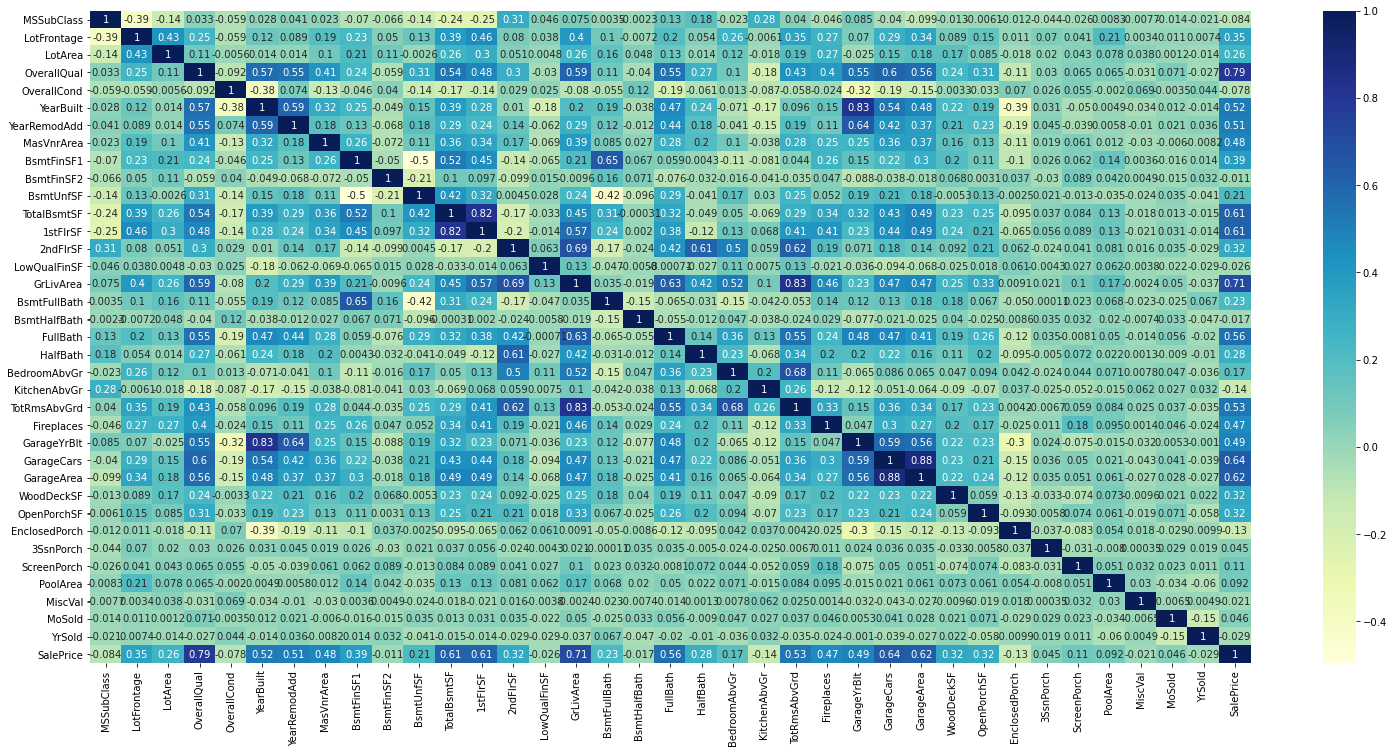

In [7]:
plt.figure(figsize=(26,12))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## 2. Data Cleaning

Removing nulls

In [8]:
null_values = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null_values.index.name = 'Features'
null_values.head(20)

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageCond,5.55
GarageType,5.55
GarageYrBlt,5.55


In [9]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage', 'Id'],axis=1)

In [10]:
df.isnull().sum()[df.isnull().sum()>0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [11]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [12]:
for col in list(df_numeric.columns):
    df[col] = df[col].fillna(df[col].median())


In [13]:
for col in ("MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Electrical","GarageType","GarageFinish","GarageQual","GarageCond"):
    df[col] = df[col].fillna(df[col].mode()[0])

In [14]:
df.isnull().values.any()

False

In [15]:
df.shape

(1460, 74)

In [16]:
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [18]:
# columns MSSubClass is categorical and not numerical hence converting it to object
df['MSSubClass']=df['MSSubClass'].astype('object')

In [19]:
# split into X and y
X = df.drop(['SalePrice'], axis=1) # predictors in variable X

y = df['SalePrice'] # response variable in Y

In [20]:
categorical = X.select_dtypes(include=['object'])
categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [21]:
dummies = pd.get_dummies(categorical, drop_first=True)
dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [22]:
X = X.drop(list(categorical.columns), axis=1)

In [23]:
X = pd.concat([X, dummies], axis=1)

In [24]:
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=244)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-284844263631029.7
[ 7.49421305e+03  8.36244853e+03  6.33921671e+03  1.26288151e+04
  2.38275051e+03  3.89761100e+03 -1.90966729e+16 -6.75438342e+15
 -1.85008200e+16  1.83684436e+16 -7.54550868e+15 -8.52026275e+15
 -9.49036524e+14  1.02564474e+16  6.83000000e+02 -2.47812500e+02
  3.75500000e+02 -2.12500000e+03 -2.80700000e+03 -2.86200000e+03
 -7.24000000e+02  5.26812500e+02  1.76225000e+03  2.83225000e+03
  1.21700000e+03  1.02100000e+03  1.50175000e+03  1.25000000e+00
  9.21500000e+02  5.55875000e+02  4.73684375e+03  4.03000000e+02
 -5.76250000e+02 -7.01625000e+02  1.11300000e+03  4.28500000e+02
 -3.15000000e+02 -4.11750000e+02  1.88100000e+03  9.81562500e+02
 -2.34300000e+03 -9.35250000e+02 -9.67000000e+02  4.08042974e+15
 -1.47000000e+03 -1.30650000e+03 -4.82750000e+02  9.13808310e+14
  6.78137500e+03  3.22125000e+03  1.36052500e+04  9.47200000e+03
  2.02650000e+03 -3.24625000e+02  1.76500000e+02  7.34000000e+02
  8.02250000e+02 -8.40500000e+02  1.53700000e+03 -2.25250000e+02
  2.06

In [29]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9484396961671698
-1.2382317471897104e+22
328990768766.8125
3.490219341281206e+34
322224063.43468416
7.968537308861201e+31


## Ridge Regression

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [31]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [32]:
print(model_ridge.best_params_)

{'alpha': 500}


In [33]:
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.77911657e+03  8.65152446e+03  2.67467991e+03  1.87340162e+03
  3.14782592e+03  4.01555362e+03  2.49770207e+03  7.32908480e+02
  9.27554878e+02  3.80046735e+03  5.76361604e+03  4.73635813e+03
 -4.19997930e+02  8.13593968e+03  2.47082524e+03  1.52173339e+02
  3.99501708e+03  1.86600143e+03  1.54375176e+02 -1.77493665e+03
  4.27179396e+03  3.68067137e+03  1.14449456e+03  4.39379488e+03
  3.12428278e+03  1.92079549e+03  1.03482162e+03 -3.04544383e+01
  9.96499590e+02  1.15756023e+03  1.36829815e+02 -1.14773045e+01
 -2.03040927e+02 -4.85587977e+02 -5.70896961e+02  2.29246933e+02
  4.42512769e+01  3.51075867e+02  5.89367999e+02  6.82461687e+02
  3.74688278e+02 -9.69298231e+02 -2.90811693e+02 -9.78299341e+02
 -1.70684950e+03 -1.77754919e+03 -4.64389186e+02 -1.01005833e+03
  7.08063691e+02  1.89207388e+02  1.32618472e+03 -1.00958358e+03
  8.71819313e+02  3.21672798e+02 -2.18611608e+03 -4.10290120e+02
  1.47401669e+03  4.91077614e+02  1.48521676e+03 -7.89279587e+02
  2.13238939e+03 -1.13946

In [34]:
# R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8834350584605899
0.856737103259351
743765782541.6289
403816922177.1511
728467955.4766198
921956443.3268291


In [35]:
ridge_val = pd.DataFrame(index=X.columns)
ridge_val['Ridge'] = ridge.coef_
pd.set_option('display.max_rows', None)
ridge_val.sort_values(by='Ridge',ascending=False)
ridge_val.head(15)

,Ridge
LotArea,2779.116566
OverallQual,8651.524463
OverallCond,2674.679910
YearBuilt,1873.401625
YearRemodAdd,3147.825917
MasVnrArea,4015.553616
BsmtFinSF1,2497.702073
BsmtFinSF2,732.908480
BsmtUnfSF,927.554878
TotalBsmtSF,3800.467346


## Lasso

In [36]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   18.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [37]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [38]:

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [39]:
lasso.coef_

array([ 3.99070698e+03,  1.30980498e+04,  4.46775723e+03,  7.31357867e+03,
        3.17967134e+03,  3.21888337e+03,  2.32380734e+03,  0.00000000e+00,
       -0.00000000e+00,  2.61704790e+03,  0.00000000e+00,  0.00000000e+00,
       -1.73668775e+03,  3.14165151e+04,  3.03751506e+03,  0.00000000e+00,
        2.14408971e+03,  0.00000000e+00, -1.57639590e+03, -3.78768789e+03,
        0.00000000e+00,  1.29423544e+03,  5.19148029e+02,  5.42645962e+03,
        0.00000000e+00,  8.61100164e+02,  3.07916159e+02, -0.00000000e+00,
        5.13901003e+02,  3.90395718e+02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -4.82893502e+02,
       -1.16270821e+03, -1.59849893e+03, -0.00000000e+00, -8.37861377e+02,
        0.00000000e+00,  0.00000000e+00,  1.71503815e+03, -0.00000000e+00,
        1.31888780e+03,  

In [40]:
# R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9233718408720845
0.8451987626381636
488941202953.6281
436340187465.5424
478884625.81158483
996210473.665622


In [41]:
lasso_val = pd.DataFrame(index=X.columns)
lasso_val['Lasso'] = ridge.coef_
pd.set_option('display.max_rows', None)
lasso_val.sort_values(by='Lasso',ascending=False)
lasso_val.head(15)

,Lasso
LotArea,2779.116566
OverallQual,8651.524463
OverallCond,2674.679910
YearBuilt,1873.401625
YearRemodAdd,3147.825917
MasVnrArea,4015.553616
BsmtFinSF1,2497.702073
BsmtFinSF2,732.908480
BsmtUnfSF,927.554878
TotalBsmtSF,3800.467346


In [42]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.484397e-01,8.834351e-01,9.233718e-01
1,R2 Score (Test),-1.238232e+22,8.567371e-01,8.451988e-01
2,RSS (Train),3.289908e+11,7.437658e+11,4.889412e+11
3,RSS (Test),3.490219e+34,4.038169e+11,4.363402e+11
4,MSE (Train),1.795060e+04,2.699015e+04,2.188343e+04
5,MSE (Test),8.926666e+15,3.036374e+04,3.156280e+04


In [43]:
betas = pd.DataFrame(index=X.columns)

In [44]:
betas.rows = X.columns

In [45]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [46]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotArea,7.494213e+03,2779.116566,3990.706977
OverallQual,8.362449e+03,8651.524463,13098.049756
OverallCond,6.339217e+03,2674.679910,4467.757234
YearBuilt,1.262882e+04,1873.401625,7313.578674
YearRemodAdd,2.382751e+03,3147.825917,3179.671345
MasVnrArea,3.897611e+03,4015.553616,3218.883367
BsmtFinSF1,-1.909667e+16,2497.702073,2323.807342
BsmtFinSF2,-6.754383e+15,732.908480,0.000000
BsmtUnfSF,-1.850082e+16,927.554878,-0.000000
TotalBsmtSF,1.836844e+16,3800.467346,2617.047901


## Problem Statement 1:

### Question 1:
Which variables are significant in predicting the price of a house

- LotArea --> Lot size in square feet
- OverallQual --> Rates the overall material and finish of the house
- OverallCond -->  Rates the overall condition of the house
- YearBuilt --> Original construction date
- YearRemodAdd --> Remodel date (same as construction date if no remodeling or additions)

### Question 2:
How well those variables describe the price of a house

##### Ridge

- R2 Score (Train) --> 0.88
- R2 Score (Test)  --> 0.85

##### Lasso

- R2 Score (Train) --> 0.92
- R2 Score (Test)  --> 0.84


In [47]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.484397e-01,8.834351e-01,9.233718e-01
1,R2 Score (Test),-1.238232e+22,8.567371e-01,8.451988e-01
2,RSS (Train),3.289908e+11,7.437658e+11,4.889412e+11
3,RSS (Test),3.490219e+34,4.038169e+11,4.363402e+11
4,MSE (Train),1.795060e+04,2.699015e+04,2.188343e+04
5,MSE (Test),8.926666e+15,3.036374e+04,3.156280e+04


## Problem Statement 2:

#### Question 1:
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Output for model_cv.best_params_ returned following for ridge and lasso

Ridge: 500 {'alpha': 500}

Lasso: 500 {'alpha': 500}

### Doubling the alpha value for both ridge and lasso

#### Ridge

In [48]:
alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.36313173e+03  7.18798662e+03  1.92273625e+03  1.61883818e+03
  2.74485883e+03  3.72499237e+03  2.63467412e+03  5.67203557e+02
  9.97699993e+02  3.95258791e+03  5.17182508e+03  3.57983293e+03
 -3.05232999e+02  6.75043593e+03  2.09060873e+03  9.58790753e+01
  3.48118931e+03  1.84158107e+03  5.95833295e+02 -1.41448375e+03
  4.07566722e+03  3.69747311e+03  1.19328273e+03  4.01135344e+03
  3.50821173e+03  1.99667221e+03  1.15134124e+03 -4.22173863e+01
  8.31570380e+02  1.04655338e+03  3.25628213e+02 -2.98837435e+01
 -9.78128173e+01 -3.48908129e+02 -7.48324130e+02  1.88329335e+02
  5.71337868e+00  2.72577817e+02  1.10478725e+03  6.81213055e+02
  2.72908668e+02 -8.15661602e+02 -3.06262735e+02 -8.64657156e+02
 -1.19285891e+03 -1.51276779e+03 -4.79187011e+02 -8.24814057e+02
  5.28017877e+02  5.04932567e+01  1.20136259e+03 -1.14151081e+03
  6.37547578e+02  3.90200930e+02 -1.61353827e+03 -7.27262270e+02
  1.13467591e+03  4.24606799e+02  7.75644194e+02 -6.66855306e+02
  1.68136500e+03 -8.57223

In [49]:
# R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8592545788354269
0.842433849115433
898054139856.6862
444133683857.3983
879582898.9781451
1014003844.4232838


In [50]:
ridge_val = pd.DataFrame(index=X.columns)
ridge_val['Ridge'] = ridge.coef_
pd.set_option('display.max_rows', None)
ridge_val.sort_values(by='Ridge',ascending=False)
ridge_val.head(15)

,Ridge
LotArea,2363.131726
OverallQual,7187.986625
OverallCond,1922.736247
YearBuilt,1618.838180
YearRemodAdd,2744.858829
MasVnrArea,3724.992372
BsmtFinSF1,2634.674122
BsmtFinSF2,567.203557
BsmtUnfSF,997.699993
TotalBsmtSF,3952.587908


#### Lasso

In [51]:
alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1000)

In [52]:
lasso.coef_

array([ 3.43189841e+03,  1.64475485e+04,  3.33748481e+03,  6.12552494e+03,
        3.58805561e+03,  2.11398696e+03,  1.51808216e+01,  0.00000000e+00,
       -0.00000000e+00,  1.21095241e+03,  0.00000000e+00,  0.00000000e+00,
       -1.36076649e+03,  2.80890174e+04,  3.45315033e+03,  0.00000000e+00,
        1.95388372e+03,  0.00000000e+00, -1.93680205e+02, -4.07560115e+03,
        0.00000000e+00,  1.96383421e+03,  2.36398615e+02,  6.54875967e+03,
        0.00000000e+00,  8.65610459e+02,  0.00000000e+00, -0.00000000e+00,
        1.83921733e+02,  1.64805113e+02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -1.70714875e-01,
       -1.04268355e+03, -1.76250543e+03, -0.00000000e+00, -3.74829054e+02,
        0.00000000e+00,  0.00000000e+00,  1.08954964e+03, -7.18462901e+02,
        1.10028781e+03,  

In [53]:
# R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8927497985691955
0.8418725768401475
684331231513.208
445715749052.6837
670255858.4850225
1017615865.4170861


In [54]:
lasso_val = pd.DataFrame(index=X.columns)
lasso_val['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
lasso_val.sort_values(by='Lasso',ascending=False)
lasso_val.head(15)

,Lasso
LotArea,3431.898409
OverallQual,16447.548483
OverallCond,3337.484805
YearBuilt,6125.524940
YearRemodAdd,3588.055609
MasVnrArea,2113.986962
BsmtFinSF1,15.180822
BsmtFinSF2,0.000000
BsmtUnfSF,-0.000000
TotalBsmtSF,1210.952410


#### Even after changing the alpha value the most important predictor variables did not change with respect to Ridge or Lasso but coefficent of these predictor have changed.

#### Question 3:

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [55]:
X = X.drop(['YearRemodAdd','LotArea','OverallQual','OverallCond','YearBuilt'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [56]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   18.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
print(model_cv.best_params_)

{'alpha': 500}


In [58]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [59]:
lasso.coef_

array([ 3.15305941e+03,  2.04198223e+03,  0.00000000e+00, -0.00000000e+00,
        3.59895740e+03,  0.00000000e+00,  0.00000000e+00, -2.39261094e+03,
        3.49228291e+04,  2.37470894e+03,  4.02002298e+01,  2.91688873e+03,
        0.00000000e+00, -1.78916108e+03, -5.61888897e+03,  0.00000000e+00,
        1.95454378e+03,  1.60373021e+03,  5.86926058e+03,  0.00000000e+00,
        1.18191351e+03,  3.48786382e+02, -3.49685146e+02,  7.04616461e+02,
        5.50173816e+02,  0.00000000e+00,  2.40724725e+02, -0.00000000e+00,
        0.00000000e+00, -5.18207086e+02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -1.49968354e+02, -8.15099598e+02,
       -6.43548102e+02, -0.00000000e+00, -9.58871982e+02,  0.00000000e+00,
        4.08446931e+01,  1.44765676e+03, -0.00000000e+00,  0.00000000e+00,
        1.27392352e+02, -8.18079208e+02,  0.00000000e+00,  1.13549946e+03,
        4.52093481e+02,  

In [60]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9145553209412579
0.8319802909761312
545196761091.819
473599259171.3936
533983115.6628981
1081276847.423273


In [61]:
# Top 5 most important predictor variables:
lasso_val = pd.DataFrame(index=X.columns)
lasso_val['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
lasso_val.sort_values(by='Lasso',ascending=False)
lasso_val.head(5)

,Lasso
MasVnrArea,3153.059412
BsmtFinSF1,2041.982230
BsmtFinSF2,0.000000
BsmtUnfSF,-0.000000
TotalBsmtSF,3598.957403
